Даны значения зарплат из выборки выпускников: 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150. Посчитать (желательно без использования статистических методов наподобие std, var, mean) среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий, первый и третий квартили, интерквартильное расстояние. Найти выбросы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [1]:
list = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [3]:
df = pd.DataFrame(list)

In [4]:
mean = df.sum() / df.count()
mean 

0    65.3
dtype: float64

In [5]:
list_std = np.sqrt(((df - df.mean())**2).sum() / df.count())
list_std

0    30.823854
dtype: float64

In [6]:
disp_norm = ((df - df.mean())**2).sum() / df.count()
disp_norm

0    950.11
dtype: float64

In [7]:
disp_ddof = ((df - df.mean())**2).sum() / (df.count() - 1)
disp_ddof

0    1000.115789
dtype: float64

In [8]:
df.count()

0    20
dtype: int64

In [9]:
df.sum() / (df.count() * 0.75)

0    87.066667
dtype: float64

In [10]:
df.describe()

,0
count,20.000000
mean,65.300000
std,31.624607
min,17.000000
25%,42.000000
50%,67.500000
75%,81.000000
max,150.000000


In [11]:
df.median()

0    67.5
dtype: float64

In [12]:
df.quantile(0.25)

0    42.0
Name: 0.25, dtype: float64

In [13]:
df.quantile(0.75)

0    81.0
Name: 0.75, dtype: float64

In [14]:
interquantile = df.quantile(0.75) - df.quantile(0.25)
interquantile

0    39.0
dtype: float64

In [15]:
import seaborn as sns

In [16]:
df = pd.DataFrame(list, columns=['name'])

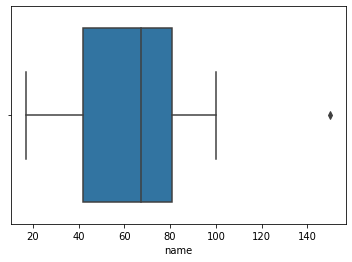

In [17]:
sns.boxplot(df['name'], orient = 'v')
plt.show()

In [18]:
from matplotlib.cbook import boxplot_stats  
boxplot_stats(df['name']).pop(0)['fliers']

array([150])

В первом ящике находится 8 мячей, из которых 5 - белые. Во втором ящике - 12 мячей, из которых 5 белых. Из первого ящика вытаскивают случайным образом два мяча, из второго - 4. Какова вероятность того, что 3 мяча белые?


In [23]:
p1 = ((1/2) * (5/8) * (4/7)) + ((1/2) * (5/12) * (6/11) * (5/10) * (4/9)) 
p1

0.2038239538239538

In [24]:
p2 = ((1/2) * (5/8) * (2/7)) + ((1/2) * (5/12) * (4/11) * (5/10) * (4/9))
p2

0.10612073112073112

In [25]:
p3 = ((1/2) * (3/8) * (2/7)) + ((1/2) * (5/12) * (4/11) * (3/10) * (4/9))
p3

0.06367243867243867

In [26]:
p_all = p1 + p2 + p3
p_all

0.37361712361712357

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a). на факультете A б). на факультете B в). на факультете C?

Для равномерной выборки возьмем факултет С за факултет С1 и С2

In [31]:
A = 0.8
B = 0.7
C1 = 0.45
C2 = 0.45
C = 0.9
p = 1/4

In [32]:
P1 = (p * A) / ((A * p) + (B * p) + (C1 * p) + (C2 * p))
P1

0.33333333333333337

In [33]:
P2 = (p * B) / ((A * p) + (B * p) + (C1 * p) + (C2 * p))
P2

0.2916666666666667

In [34]:
P3 = (p * C) / ((A * p) + (B * p) + (C1 * p) + (C2 * p))
P3

0.375

Устройство состоит из трех деталей. Для первой детали вероятность выйти из строя в первый месяц равна 0.1, для второй - 0.2, для третьей - 0.25. Какова вероятность того, что в первый месяц выйдут из строя: а). все детали б). только две детали в). хотя бы одна деталь г). от одной до двух деталей?

In [39]:
from math import factorial

In [40]:
def combinations(n, k):
  return int(factorial(n) / (factorial(k) * factorial(n-k)))

In [41]:
p1 = 0.1
p2 = 0.2
p3 = 0.25
n = 3
k = 1

Если я правильно понимаю нам надо посчитать по формуле Бернулли отдельно для каждой детали, затем с помощью логического "И" сложить их между собой:

In [43]:
det_1 = combinations(n, k) * (p1 ** k) * ((1 - p1) ** (n - k))
det_2 = combinations(n, k) * (p2 ** k) * ((1 - p2) ** (n - k))
det_3 = combinations(n, k) * (p3 ** k) * ((1 - p3) ** (n - k))
print(det_1)
print(det_2)
print(det_3)

0.24300000000000005
0.3840000000000001
0.421875


In [45]:
var_a = det_1 * det_2 * det_3
var_a

0.03936600000000002

In [46]:
var_b = (det_1 * det_2) + (det_2 * det_3) + (det_1 * det_3)
var_b

0.3578276250000001

Вероятно я неправильно посчитал, но вполне возможно, что при таких условиях хотя бы одна лампочка выйдет из строя со стопроцентной вероятностью

In [47]:
var_c = det_1 + det_2 + det_3
var_c

1.0488750000000002

In [49]:
var_g = var_b * var_c
var_g

0.3753164501718752